# Relationship of some selected Prosper Loan variables
## by Ismail Adamu


## Investigation Overview

>For this presentation, I concentrate solely on the impact of income range on loan status, as well as the impact of loan term on monthly payment and loan amount.




## Dataset Overview

>The data set contains 113,937 loans, each with 81 variables including loan amount, borrower rate (or interest rate), current loan status, borrower income, among others.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# select important variables for analysis
var =  ['LoanStatus','LoanOriginalAmount','BorrowerAPR', 'BorrowerRate','Term',
       'LenderYield','Occupation', 'EmploymentStatus','IsBorrowerHomeowner','IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome','MonthlyLoanPayment','Investors']

In [4]:
# sub set important variables 
df_loan = df[var]
df_loan.head()

,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,Term,LenderYield,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Investors
0,Completed,9425,0.16516,0.1580,36,0.1380,Other,Self-employed,True,"$25,000-49,999",True,3083.333333,330.43,258
1,Current,10000,0.12016,0.0920,36,0.0820,Professional,Employed,False,"$50,000-74,999",True,6125.000000,318.93,1
2,Completed,3001,0.28269,0.2750,36,0.2400,Other,Not available,False,Not displayed,True,2083.333333,123.32,41
3,Current,10000,0.12528,0.0974,36,0.0874,Skilled Labor,Employed,True,"$25,000-49,999",True,2875.000000,321.45,158
4,Current,15000,0.24614,0.2085,36,0.1985,Executive,Employed,True,"$100,000+",True,9583.333333,563.97,20


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Income Range

>The two income brackets with the greatest number of borrowers are 25k-49k and 50k-74k; they both have nearly the same numbers of borrowers. The number of borrowers with incomes between 75k and 99k and 100,000k+ is nearly equal.



In [5]:
# combine  "Not employed" and "Not displayed," to "$0"
df_loan['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [6]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df_loan['IncomeRange'] = df_loan['IncomeRange'].astype(ordered_var)

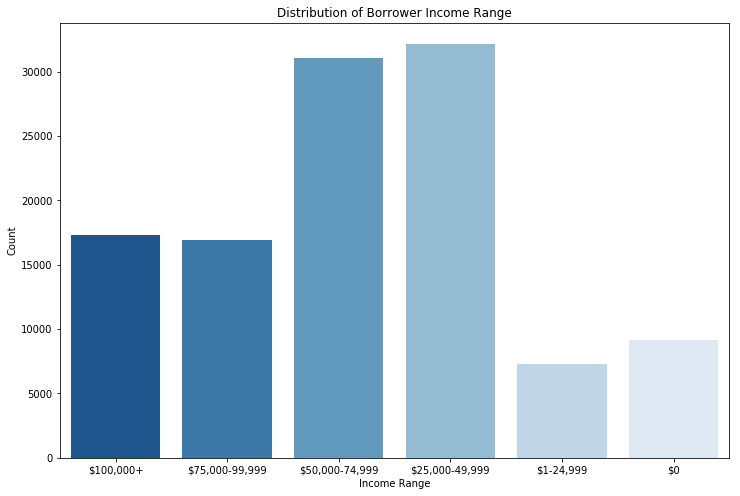

In [7]:
# bar chart
plt.figure(figsize =(12,8))
sb.countplot(data = df_loan, x = 'IncomeRange', palette = "Blues_r")
plt.ylabel('Count')
plt.xlabel('Income Range')
plt.title('Distribution of Borrower Income Range');

## Distribution of Loan Status

> The plot demonstrates that completed loans are highest followed by current loans in terms of importance. Compared to current and completed loans, the number of defaulted loans is significantly lower. Loan cancellations are extremely rare.

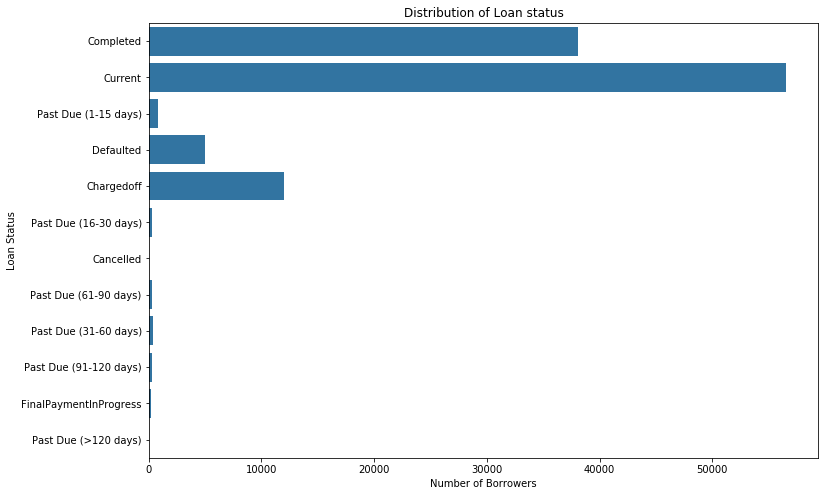

In [8]:
# Loan status Visualization
plt.figure(figsize=(12,8))
b_color = sb.color_palette()[0]
sb.countplot(data=df_loan, y='LoanStatus',color=b_color)
plt.xlabel('Number of Borrowers')
plt.ylabel('Loan Status')
plt.title('Distribution of Loan status');

## Relationship between Income Range and Loan Status

>Although people with incomes of 0 dollar tend to default more frequently, it is surprising to see that the number of completed loans for income ranges of atleast 100,000 dollars and 75k-99k dollars is lower than 0 dollar. This suggests that the income range is unimportant for repaying a loan. The lowest completed loans belong to borrowers with incomes between 1 dollar and 25,000 dollars. For all income levels, the likelihood of a loan cancellation is typically very low.



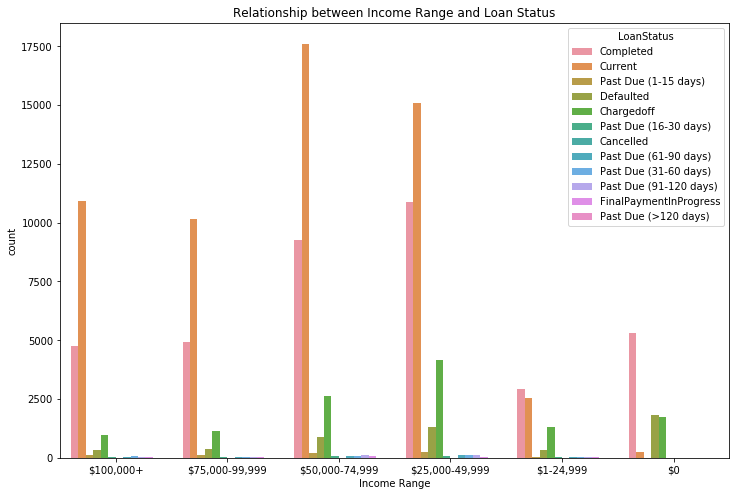

In [9]:
plt.figure(figsize=(12,8))
sb.countplot(data=df_loan, x='IncomeRange', hue='LoanStatus');
plt.xlabel('Income Range')
plt.title('Relationship between Income Range and Loan Status');

## Relationship between Monthly payment, Loan amount and Term

>This multivariate plot helps us better understand the multiple positive correlation between the Monthly Payment and Loan Amount. The amount of the monthly payment is significantly influenced by the loan's term. We can see that loans with terms of at least 60 months have the lowest monthly payments and those with terms of at least 12 months have the highest monthly payments. It is safe to assume that the monthly payment will be lower with a longer loan term.


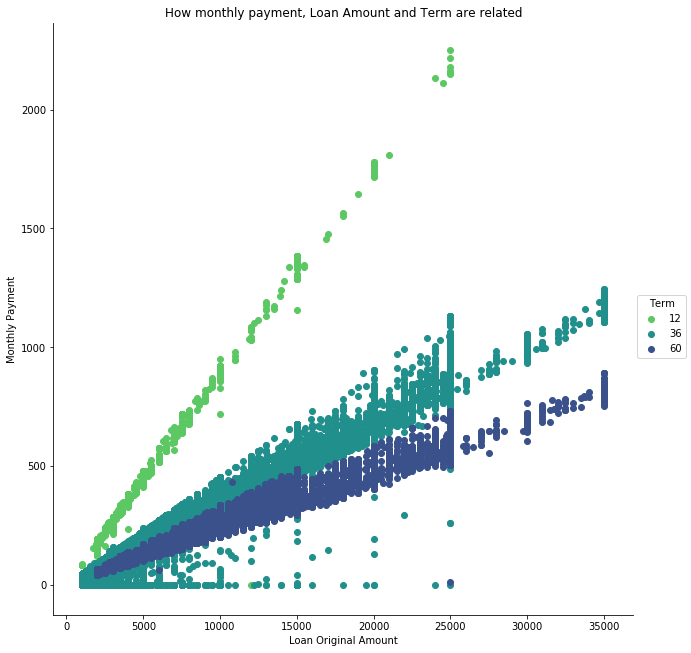

In [10]:
# plot
g = sb.FacetGrid(data=df_loan, hue='Term', size=9,palette='viridis_r')
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend()
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Payment')
plt.title('How monthly payment, Loan Amount and Term are related');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 424230 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

In [12]:
# Use this command if you are running this file in local
#!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
